In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [115]:
data = pd.read_csv('diabetes.csv')
X_train, X_test, y_train, y_test = train_test_split(data[["BMI"]], data["Outcome"], test_size=0.2, random_state=42)

In [116]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [117]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Import a model class
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('diabetes.csv')
X_train, X_test, y_train, y_test = train_test_split(data[["BMI"]], data["Outcome"], test_size=0.2, random_state=42)

# Create and train a model (e.g., Logistic Regression)
model = LogisticRegression()  # Initialize the model
model.fit(X_train, y_train)    # Train the model using training data

# Now you can use the trained model for prediction
print(model.predict([[33.6]]))

[0]


In [118]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [119]:
X_train

,BMI
60,0.0
618,28.2
346,28.7
294,21.9
231,46.2
...,...
71,28.6
106,22.4
270,45.6
435,42.4


In [120]:
y_train

,Outcome
60,0
618,1
346,0
294,0
231,1
...,...
71,0
106,0
270,1
435,1


In [121]:
print(data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [122]:
model.classes_

array([0, 1])

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Matriz de confusión
Una matriz de confusión es una representación matricial de los resultados de las predicciones de cualquier prueba binaria que se utiliza a menudo para describir el rendimiento del modelo de clasificación (o "clasificador") sobre un conjunto de datos de prueba cuyos valores reales se conocen.

1. Verdadero Positivo (TP): Predicho Verdadero y Verdadero en realidad.
2. Verdadero Negativo (TN): Predicho Falso y Falso en realidad.
3. Falso Positivo (FP): Predicción de verdadero y falso en la realidad.
4. Falso Negativo (FN): Predicción de falso y verdadero en la realidad.

In [124]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[88 11]
 [42 13]]


In [125]:
print(len(y_test))

154


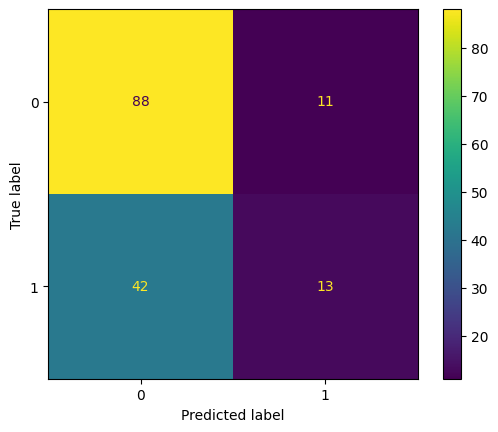

In [126]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

In [127]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

print("TN:", TN)
print("FP:", FP)
print("FN:", FN)
print("TP:", TP)

TN: 88
FP: 11
FN: 42
TP: 13


## Accuracy

accuracy = (TP + TN)/Total

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, y_pred)
print(f'accuracy = {accuracy_score}')

accuracy = 0.6558441558441559


In [129]:
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print(f'accuracy = {accuracy}')

accuracy = 0.6558441558441559


In [130]:
accuracy = (TN+ TP) / (TP + TN + FP + FN)
print(f'accuracy = {accuracy}')

accuracy = 0.6558441558441559


##Presición
La precisión es el cociente entre el número de verdaderos positivos y el número de falsos positivos. La precisión es intuitivamente la capacidad del clasificador de no etiquetar como positiva una muestra que es negativa.
- tp / (tp + fp)

El mejor valor es 1 y el peor valor es 0.

In [131]:
from sklearn.metrics import precision_score
precision_score = precision_score(y_test, y_pred)
print(f'precision = {precision_score}')

precision = 0.5416666666666666


In [132]:
precision = cm[1][1] / (cm[1][1] + cm[0][1])
print(f'precision = {precision}')

precision = 0.5416666666666666


In [133]:
precision = TP / ( TP  + FP)
print(f'precision = {precision}')

precision = 0.5416666666666666


## Recall
El recall es la relación entre el número de verdaderos positivos y el número de falsos negativos. El recall es intuitivamente la capacidad del clasificador de encontrar todas las muestras positivas.
- tp / (tp + fn)

El mejor valor es 1 y el peor valor es 0.

In [134]:
from sklearn.metrics import recall_score
recall_score = recall_score(y_test, y_pred)
print(f'recall = {recall_score}')

recall = 0.23636363636363636


In [135]:
recall_score = cm[1][1] / (cm[1][1] + cm[1][0])
print(f'recall = {recall_score}')

recall = 0.23636363636363636


In [136]:
recall_score = TP/(TP + FN)
print(f'recall = {recall_score}')

recall = 0.23636363636363636


##F1 score
La puntuación F1 se puede interpretar como una media armónica de la precisión y el recall, donde una puntuación F1 alcanza su mejor valor en 1 y su peor puntuación en 0. La contribución relativa de la precisión y la recuperación a la puntuación F1 son iguales.


In [137]:
import sklearn.metrics as metrics
f1_score = metrics.f1_score(y_test, y_pred)
print(f'f1_score = {f1_score}')

f1_score = 0.3291139240506329


In [138]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print(f'f1_score = {f1_score}')

f1_score = 0.32911392405063294


##classification_report

In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77        99
           1       0.54      0.24      0.33        55

    accuracy                           0.66       154
   macro avg       0.61      0.56      0.55       154
weighted avg       0.63      0.66      0.61       154



##Curva ROC
La curva ROC es una representación visual del rendimiento del modelo en todos los umbrales. La versión larga del nombre, característica operativa del receptor, es una retención. de la detección de radares de la Segunda Guerra Mundial.

La curva ROC se dibuja calculando la tasa de verdaderos positivos (TPR) y una tasa de falsos positivos (FPR) en cada umbral posible (en la práctica, al intervalos seleccionados), luego se grafica la TPR sobre la FPR. Un modelo perfecto que en algún umbral tiene una TPR de 1.0 y una FPR de 0.0, puede estar representado por un punto en (0, 1) si se ignoran todos los demás umbrales, o bien de la siguiente manera:

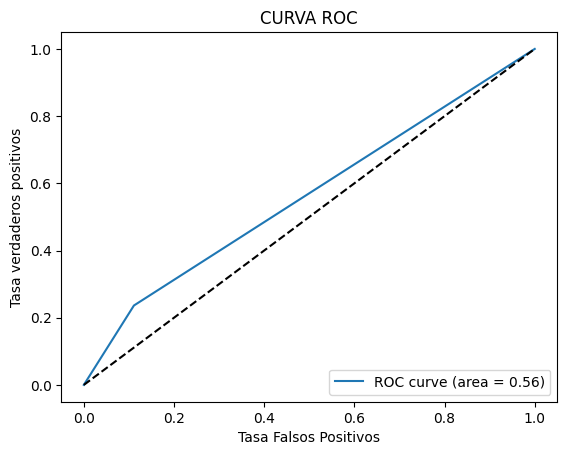

In [140]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

def curva_roc(y_real, y_pred):
  fpr, tpr, thresholds = roc_curve(y_real, y_pred)
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
  plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal para referencia
  plt.xlabel('Tasa Falsos Positivos')
  plt.ylabel('Tasa verdaderos positivos')
  plt.title('CURVA ROC')
  plt.legend(loc='lower right')
  plt.show()

curva_roc(y_test,y_pred)

In [141]:
#Datos para la tarea
y_test = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
y_pred = [0, 1, 0, 1, 1, 1, 1, 1 ,0, 0]
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 0]
 [2 6]]


In [142]:
TN=2
FP=0
FN=2
TP=6
print("TN = ", TN)
print("FP = ", FP)
print("FN = ", FN)
print("TP = ", TP)


TN =  2
FP =  0
FN =  2
TP =  6


Calcul de las métricas

In [143]:
accuracy = (TN+ TP) / (TP + TN + FP + FN)
print(f'accuracy = {accuracy}')
precision = cm[1][1] / (cm[1][1] + cm[0][1])
print(f'precision = {precision}')
recall = cm[1][1] / (cm[1][1] + cm[1][0])
print(f'recall = {recall}')
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'f1_score = {f1_score}')

accuracy = 0.8
precision = 1.0
recall = 0.75
f1_score = 0.8571428571428571


In [144]:
import sklearn.metrics as metrics
f1_score = metrics.f1_score(y_test, y_pred)
print(f'f1_score = {f1_score}')
precision_score = metrics.precision_score(y_test, y_pred)
print(f'precision = {precision_score}')
recall_score = metrics.recall_score(y_test, y_pred)
print(f'recall = {recall_score}')
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print(f'accuracy = {accuracy_score}')


f1_score = 0.8571428571428571
precision = 1.0
recall = 0.75
accuracy = 0.8


##Tarea

* TN: ?
* FP: ?
* FN: ?
* TP: ?


---------


- accuracy = (TP + TN)/Total
- presicion = TP / (TP + FP)
- recall = TP / (TP + FN)
- f1_score = 2 * (precision * recall) / (precision + recall)

Calcular matriz de confusión y las métricas de forma manual y con sklearn.metrics

In [145]:
# Assuming you have y_test and y_pred defined

# Calculate AUC
auc = metrics.roc_auc_score(y_test, y_pred)

print(f'AUC = {auc}')

AUC = 0.875


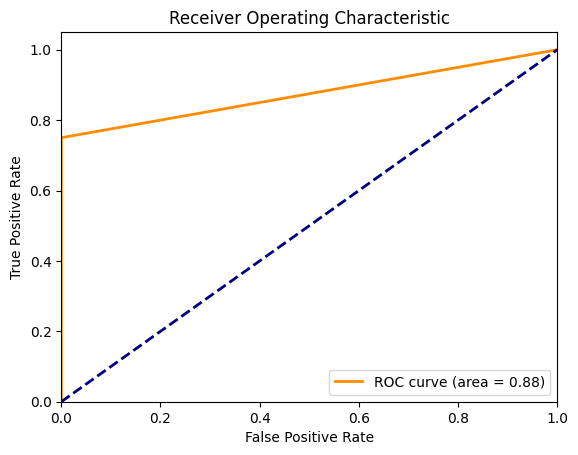

In [147]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Assuming you have y_test and y_pred defined

# Calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

[[3 1 1]
 [2 3 0]
 [1 1 2]]
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.60      0.60      0.60         5
           2       0.67      0.50      0.57         4

    accuracy                           0.57        14
   macro avg       0.59      0.57      0.57        14
weighted avg       0.58      0.57      0.57        14



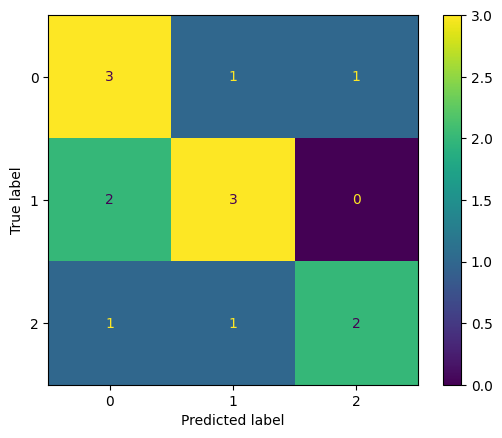

In [161]:
y_test = [0,0,0,0,0,1,1,1,1,1,2,2,2,2]
y_pred = [0,1,2,0,0,1,0,1,0,1,1,2,0,2]
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print (classification_report(y_test, y_pred))